# Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
appns = pd.read_csv('/content/drive/MyDrive/Loan Case Study (1)/application_data.csv')
prev_appns = pd.read_csv('/content/drive/MyDrive/Loan Case Study (1)/previous_application.csv')

# Metadata analysis

In [ ]:
print(appns.shape)
print(prev_appns.shape)

(307511, 122)
(1670214, 37)


The 'applications' dataset contains 122 variables

'previous applications' dataset contains 37 variables

In [ ]:
appns.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
prev_appns.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(appns.dtypes)
print(prev_appns.dtypes)

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object
SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTE

In [ ]:
appns.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [ ]:
appns.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,...,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,...,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,...,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,11.944812,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,0.211062,1.910602e-01,0.194844,0.10824,0.082438,0.059223,0.113280,0.076036,0.134576,0.100049,0.144641,...,0.100368,0.145067,0.161934,0.082167,0.093642,0.112260,0.047415,0.070166,0.107462,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,

In [ ]:
prev_appns.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [ ]:
prev_appns.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


# Removing columns with high null values

In [ ]:
null_vals_appns = appns.loc[:, (appns.isnull().sum()) > 0]
with pd.option_context('display.max_rows', None,):
  null_list = null_vals_appns.isnull().sum()
  print(null_list.sort_values())

null_list.shape

DAYS_LAST_PHONE_CHANGE               1
CNT_FAM_MEMBERS                      2
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
EXT_SOURCE_2                       660
DEF_60_CNT_SOCIAL_CIRCLE          1021
OBS_60_CNT_SOCIAL_CIRCLE          1021
DEF_30_CNT_SOCIAL_CIRCLE          1021
OBS_30_CNT_SOCIAL_CIRCLE          1021
NAME_TYPE_SUITE                   1292
AMT_REQ_CREDIT_BUREAU_MON        41519
AMT_REQ_CREDIT_BUREAU_WEEK       41519
AMT_REQ_CREDIT_BUREAU_DAY        41519
AMT_REQ_CREDIT_BUREAU_HOUR       41519
AMT_REQ_CREDIT_BUREAU_QRT        41519
AMT_REQ_CREDIT_BUREAU_YEAR       41519
EXT_SOURCE_3                     60965
OCCUPATION_TYPE                  96391
EMERGENCYSTATE_MODE             145755
TOTALAREA_MODE                  148431
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BEGINEXPLUATATION_MODE    150007
YEARS_BEGINEXPLUATATION_MEDI    150007
FLOORSMAX_AVG                   153020
FLOORSMAX_MEDI                  153020
FLOORSMAX_MODE           

(67,)

In [ ]:
null_vals_appns = appns.loc[:, (appns.isnull().sum()) > 61502]
with pd.option_context('display.max_rows', None,):
  null_list = null_vals_appns.isnull().sum()
  # print(round(null_list/null_vals_appns.shape[0]* 100, 2).sort_values())
  
  ## the threshold that is set to remove data - 20% null values
  print(appns.shape[0] *0.2)

null_list.shape

61502.200000000004


(50,)

There are 67 columns that contain null values. If the null values exceed 61502
i.e. 20 % of the total data, they should be removed. Others can be imputed with values. 

50 columns contain null values greater than 20%.

In [ ]:
appns = appns.loc[:, (appns.isnull().sum()) <= 61502]
appns.shape

(307511, 72)

72 columns remain

Same analysis is done for 'previous appns'

In [ ]:
null_vals_prev_appns = prev_appns.loc[:, (prev_appns.isnull().sum()) > 0]
with pd.option_context('display.max_rows', None,):
  null_list = null_vals_prev_appns.isnull().sum()
  print(round(null_list/null_vals_prev_appns.shape[0]* 100, 2).sort_values())

null_list.shape

AMT_CREDIT                    0.00
PRODUCT_COMBINATION           0.02
AMT_ANNUITY                  22.29
CNT_PAYMENT                  22.29
AMT_GOODS_PRICE              23.08
DAYS_FIRST_DRAWING           40.30
DAYS_FIRST_DUE               40.30
DAYS_LAST_DUE_1ST_VERSION    40.30
DAYS_LAST_DUE                40.30
DAYS_TERMINATION             40.30
NFLAG_INSURED_ON_APPROVAL    40.30
NAME_TYPE_SUITE              49.12
AMT_DOWN_PAYMENT             53.64
RATE_DOWN_PAYMENT            53.64
RATE_INTEREST_PRIMARY        99.64
RATE_INTEREST_PRIVILEGED     99.64
dtype: float64


(16,)

In [ ]:
null_vals_prev_appns = prev_appns.loc[:, (prev_appns.isnull().sum()) > null_vals_prev_appns.shape[0] *0.25]
with pd.option_context('display.max_rows', None,):
  null_list = null_vals_prev_appns.isnull().sum()
  print(round(null_list/null_vals_prev_appns.shape[0]* 100, 2).sort_values())
  
  ## the threshold that is set to remove data - 20% null values
  print(null_vals_prev_appns.shape[0] *0.25)

null_list.shape

DAYS_FIRST_DRAWING           40.30
DAYS_FIRST_DUE               40.30
DAYS_LAST_DUE_1ST_VERSION    40.30
DAYS_LAST_DUE                40.30
DAYS_TERMINATION             40.30
NFLAG_INSURED_ON_APPROVAL    40.30
NAME_TYPE_SUITE              49.12
AMT_DOWN_PAYMENT             53.64
RATE_DOWN_PAYMENT            53.64
RATE_INTEREST_PRIMARY        99.64
RATE_INTEREST_PRIVILEGED     99.64
dtype: float64
417553.5


(11,)

In [ ]:
prev_appns = prev_appns.loc[:, (prev_appns.isnull().sum()) <= null_vals_prev_appns.shape[0] *0.25]
prev_appns.shape

(1670214, 26)

In [ ]:
print(prev_appns.shape,
appns.shape)

(1670214, 26) (307511, 72)


In [ ]:
print(prev_appns.columns)
print(appns.columns)

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')
Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'D

# Handling missing values

In [ ]:
#https://www.youtube.com/watch?v=P_iMSYQnqac&t=12s

deleting rows would be easy but would create problems later on if the two tables are combined, so those missing values should be imputed using statistics

In [ ]:
prev_appns.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [ ]:
prev_appns.isnull().sum()/prev_appns.shape[0]*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

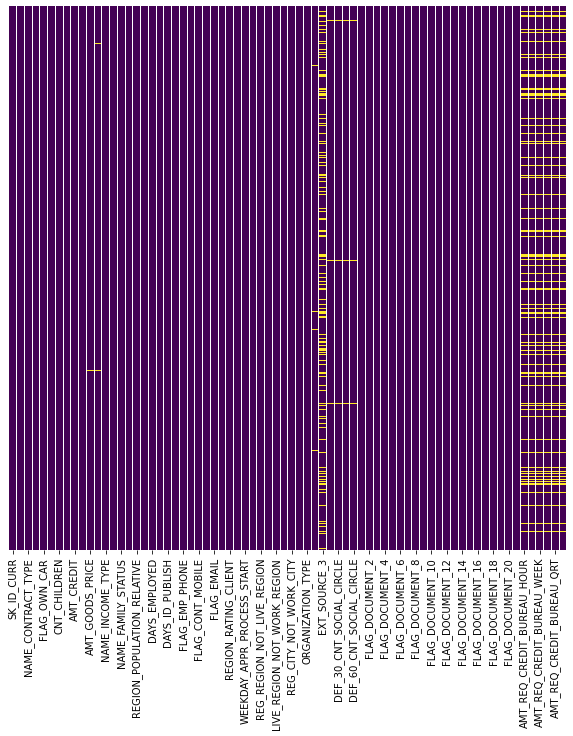

In [ ]:
plt.figure(figsize = (10, 10))
sns.heatmap(appns.isnull(),yticklabels=False,cbar=False,cmap='viridis')

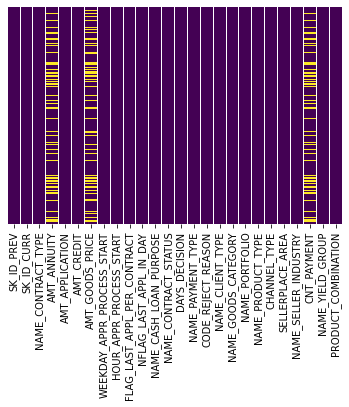

In [ ]:
sns.heatmap(prev_appns.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**missing values in 'prev_appns'**

AMT_CREDIT                       1 (0.000060 %)  

PRODUCT_COMBINATION            346 (0.020716 %)

# AMT_CREDIT

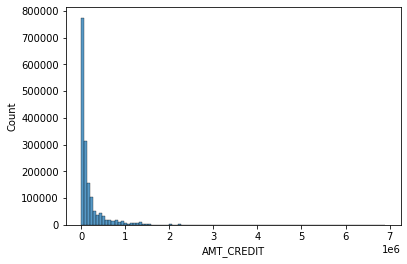

In [ ]:
sns.histplot(prev_appns['AMT_CREDIT'], bins =100)
prev_appns['AMT_CREDIT'] = prev_appns['AMT_CREDIT'].fillna(prev_appns['AMT_CREDIT'].median())

# PRODUCT_COMBINATION

In [ ]:
prev_appns['PRODUCT_COMBINATION'].value_counts()
## categorical data 

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [ ]:
prev_appns['PRODUCT_COMBINATION'] = prev_appns['PRODUCT_COMBINATION'].fillna(prev_appns['PRODUCT_COMBINATION'].mode()) 

# DAYS_LAST_PHONE_CHANGE

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


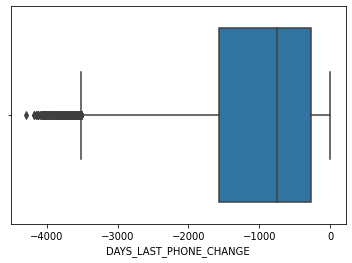

In [ ]:
sns.boxplot(appns['DAYS_LAST_PHONE_CHANGE'])
## skewed data
appns['DAYS_LAST_PHONE_CHANGE'] = appns['DAYS_LAST_PHONE_CHANGE'].fillna(appns['DAYS_LAST_PHONE_CHANGE'].median()) 

# CNT_FAM_MEMBERS

In [ ]:
appns['CNT_FAM_MEMBERS'].value_counts()
## categorial data
appns['CNT_FAM_MEMBERS'] = appns['CNT_FAM_MEMBERS'].fillna(appns['CNT_FAM_MEMBERS'].mode()) 

# AMT_ANNUITY

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


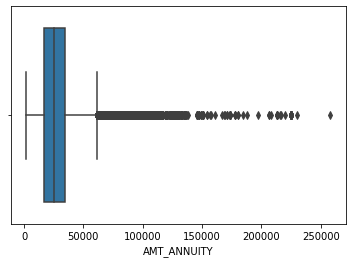

In [ ]:
sns.boxplot(appns['AMT_ANNUITY'])
## skewed data
appns['AMT_ANNUITY'] = appns['AMT_ANNUITY'].fillna(appns['AMT_ANNUITY'].median()) 

# AMT_GOODS_PRICE

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


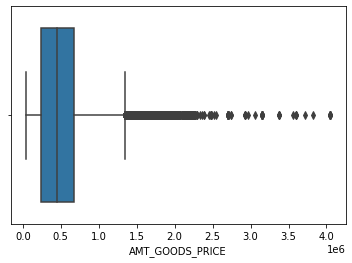

In [ ]:
sns.boxplot(appns['AMT_GOODS_PRICE'])
## skewed data
appns['AMT_GOODS_PRICE'] = appns['AMT_GOODS_PRICE'].fillna(appns['AMT_GOODS_PRICE'].median()) 

# EXT_SOURCE_2

0.5659614260608526


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


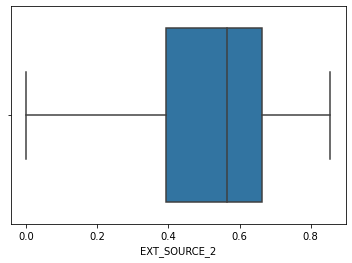

In [ ]:
sns.boxplot(appns['EXT_SOURCE_2'])
print(appns['EXT_SOURCE_2'].median())
appns['EXT_SOURCE_2'] = appns['EXT_SOURCE_2'].fillna(appns['EXT_SOURCE_2'].mean()) 

# DEF_60_CNT_SOCIAL_CIRCLE

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


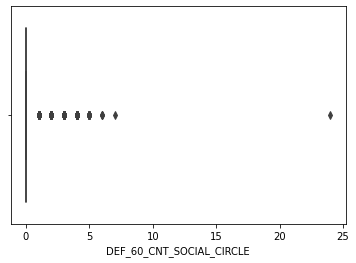

In [ ]:
sns.boxplot(appns['DEF_60_CNT_SOCIAL_CIRCLE'])
appns['DEF_60_CNT_SOCIAL_CIRCLE'].value_counts()
## skewed data
#appns['DEF_60_CNT_SOCIAL_CIRCLE'].median()
appns['DEF_60_CNT_SOCIAL_CIRCLE'] = appns['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(appns['DEF_60_CNT_SOCIAL_CIRCLE'].median()) 

# DEF_30_CNT_SOCIAL_CIRCLE

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


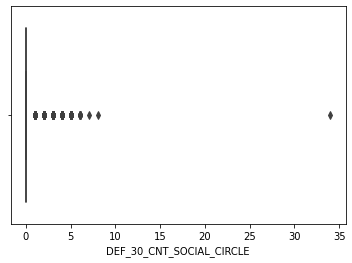

In [ ]:
sns.boxplot(appns['DEF_30_CNT_SOCIAL_CIRCLE'])
appns['DEF_30_CNT_SOCIAL_CIRCLE'].value_counts()
## skewed data
appns['DEF_30_CNT_SOCIAL_CIRCLE'] = appns['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(appns['DEF_30_CNT_SOCIAL_CIRCLE'].median()) 

# OBS_60_CNT_SOCIAL_CIRCLE

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


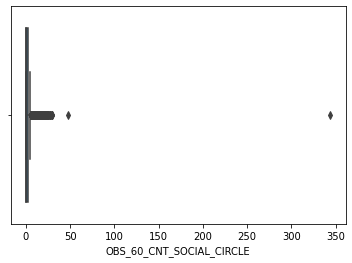

In [ ]:
sns.boxplot(appns['OBS_60_CNT_SOCIAL_CIRCLE'])
appns['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts()
## skewed data
appns['OBS_60_CNT_SOCIAL_CIRCLE'] = appns['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(appns['OBS_60_CNT_SOCIAL_CIRCLE'].median()) 

## OBS_30_CNT_SOCIAL_CIRCLE

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


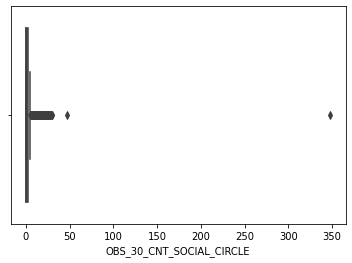

In [ ]:
sns.boxplot(appns['OBS_30_CNT_SOCIAL_CIRCLE'])
## skewed data
appns['OBS_30_CNT_SOCIAL_CIRCLE'] = appns['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(appns['OBS_30_CNT_SOCIAL_CIRCLE'].median()) 

# NAME_TYPE_SUITE

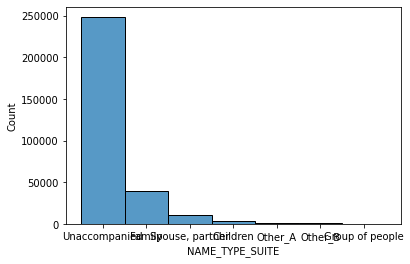

In [ ]:
sns.histplot(appns['NAME_TYPE_SUITE'])
appns['NAME_TYPE_SUITE'].value_counts()
## categorical data
appns['NAME_TYPE_SUITE'] = appns['NAME_TYPE_SUITE'].fillna(appns['NAME_TYPE_SUITE'].mode()) 

# AMT_REQ_CREDIT_BUREAU_QRT 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


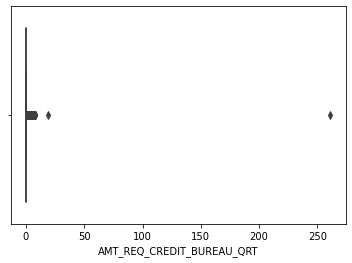

In [ ]:
sns.boxplot(appns['AMT_REQ_CREDIT_BUREAU_QRT'])
## skewed data
appns['AMT_REQ_CREDIT_BUREAU_QRT'] = appns['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(appns['AMT_REQ_CREDIT_BUREAU_QRT'].median()) 

# AMT_REQ_CREDIT_BUREAU_HOUR 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


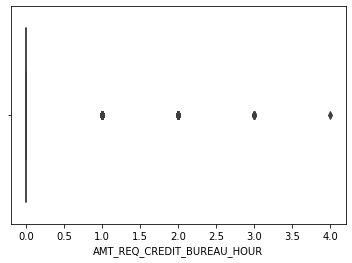

In [ ]:
sns.boxplot(appns['AMT_REQ_CREDIT_BUREAU_HOUR'])
## skewed data
appns['AMT_REQ_CREDIT_BUREAU_HOUR'] = appns['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(appns['AMT_REQ_CREDIT_BUREAU_HOUR'].median()) 

# AMT_REQ_CREDIT_BUREAU_DAY

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


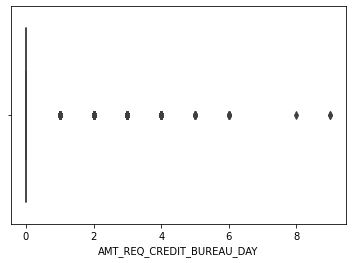

In [ ]:
sns.boxplot(appns['AMT_REQ_CREDIT_BUREAU_DAY'])
## skewed data
appns['AMT_REQ_CREDIT_BUREAU_DAY'] = appns['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(appns['AMT_REQ_CREDIT_BUREAU_DAY'].median()) 

## AMT_REQ_CREDIT_BUREAU_WEEK 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64


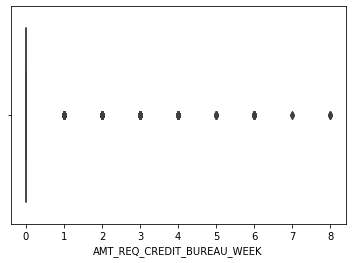

In [ ]:
sns.boxplot(appns['AMT_REQ_CREDIT_BUREAU_WEEK'])
print(appns['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts())
## skewed data
appns['AMT_REQ_CREDIT_BUREAU_WEEK'] = appns['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(appns['AMT_REQ_CREDIT_BUREAU_WEEK'].median()) 

# AMT_REQ_CREDIT_BUREAU_MON 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64


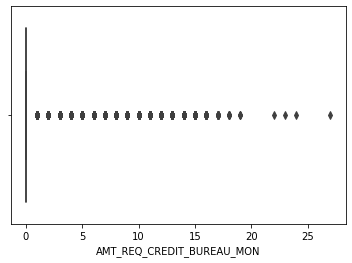

In [ ]:
sns.boxplot(appns['AMT_REQ_CREDIT_BUREAU_MON'])
print(appns['AMT_REQ_CREDIT_BUREAU_MON'].value_counts())
## skewed data
appns['AMT_REQ_CREDIT_BUREAU_MON'] = appns['AMT_REQ_CREDIT_BUREAU_MON'].fillna(appns['AMT_REQ_CREDIT_BUREAU_MON'].median()) 

# AMT_REQ_CREDIT_BUREAU_YEAR 

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


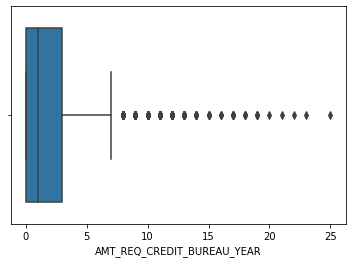

In [ ]:
sns.boxplot(appns['AMT_REQ_CREDIT_BUREAU_YEAR'])
print(appns['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts())
## skewed data
appns['AMT_REQ_CREDIT_BUREAU_YEAR'] = appns['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(appns['AMT_REQ_CREDIT_BUREAU_YEAR'].median()) 

## EXT_SOURCE_3

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0.746300    1460
0.713631    1315
0.694093    1276
0.670652    1191
0.652897    1154
            ... 
0.021492       1
0.019468       1
0.023062       1
0.014556       1
0.043227       1
Name: EXT_SOURCE_3, Length: 814, dtype: int64


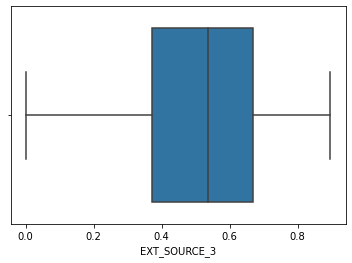

In [ ]:
sns.boxplot(appns['EXT_SOURCE_3'])
print(appns['EXT_SOURCE_3'].value_counts())
appns['EXT_SOURCE_3'] = appns['EXT_SOURCE_3'].fillna(appns['EXT_SOURCE_3'].mean()) 

# Feature Engineering


In [ ]:
## remove gender 'XNA' as that data is negligible as compared to M,F
appns = appns[appns['CODE_GENDER']!='XNA']

In [ ]:
cols = ['SK_ID_CURR', 'TARGET', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL',
        'AMT_CREDIT', 'AMT_ANNUITY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 
        'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_CONT_MOBILE',
        'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'ORGANIZATION_TYPE', 'AMT_REQ_CREDIT_BUREAU_MON', 
        'AMT_REQ_CREDIT_BUREAU_QRT']

appns = appns[cols]
appns.shape

(307507, 20)

In [ ]:
appns = appns[appns['AMT_INCOME_TOTAL']!=117000000.0]
# removing outlier

In [ ]:
default=appns[appns.TARGET==1]
non_default=appns[appns.TARGET==0]

# Outlier detection (optional)


In [ ]:
import scipy.stats as stats
z_scores = stats.zscore(appns)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)

new_df = appns[filtered_entries]

In [ ]:
new_df.info()

# correlations between variables

In [ ]:
corrs = appns.corr()

(12, 12)


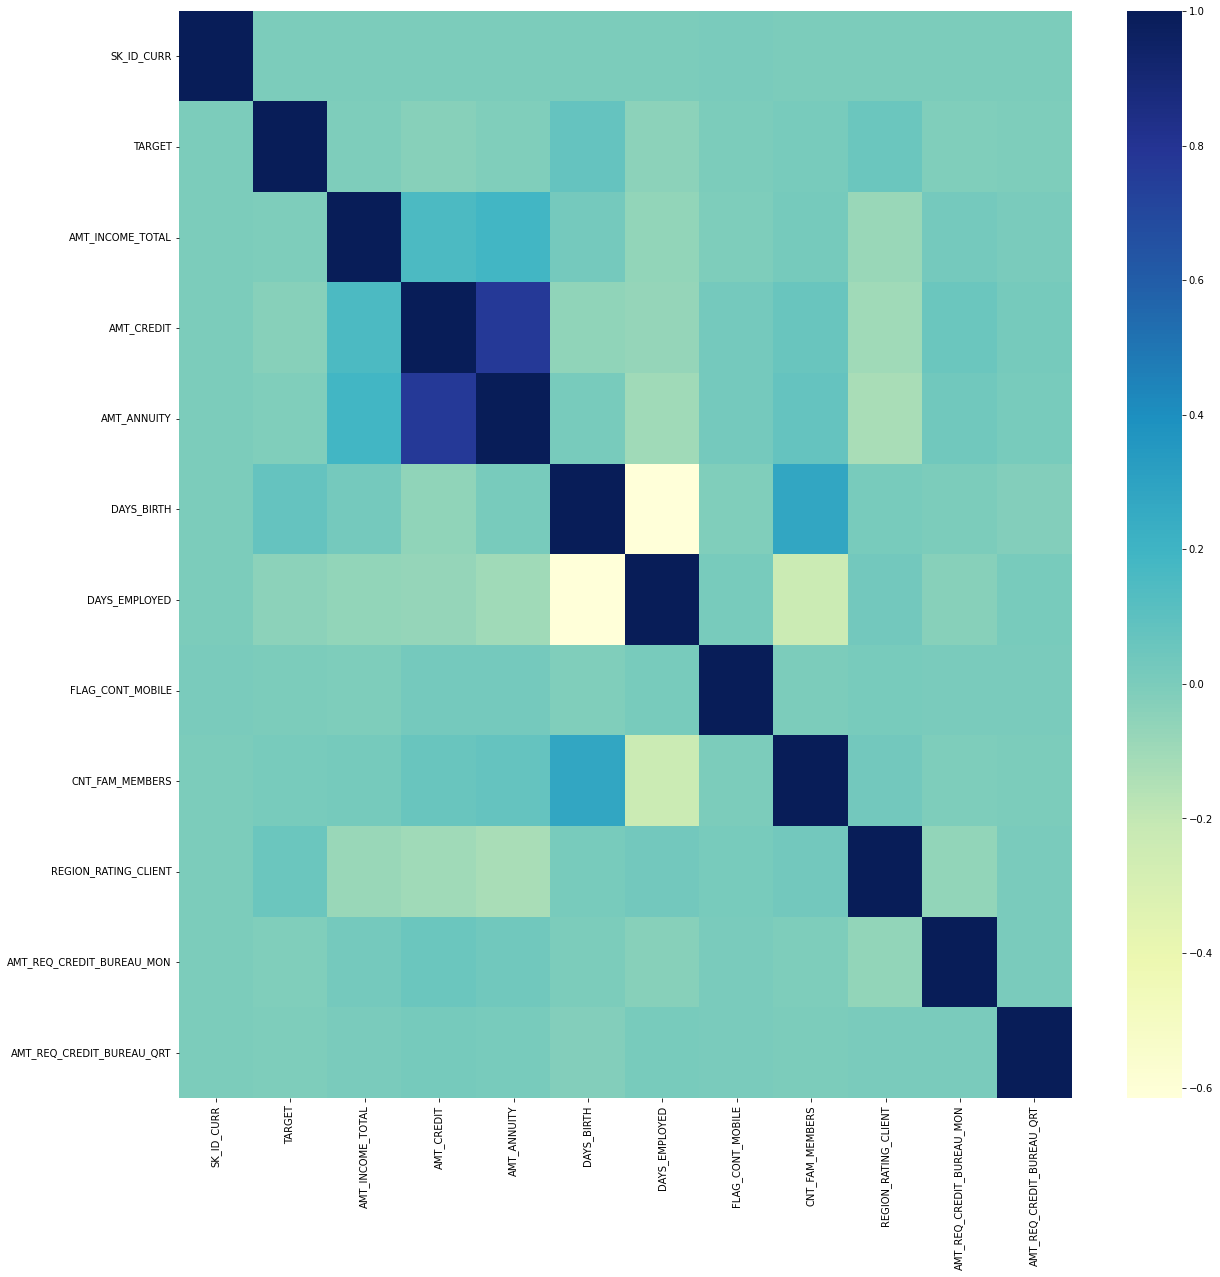

In [ ]:
#upper_tri = corrs.where(np.triu(np.ones(corrs.shape),k=1).astype(np.bool))
plt.figure(figsize = (20, 20))
print(appns.corr().shape)
dataplot = sns.heatmap(corrs, cmap="YlGnBu")

find extreme correlations 

(11, 11)


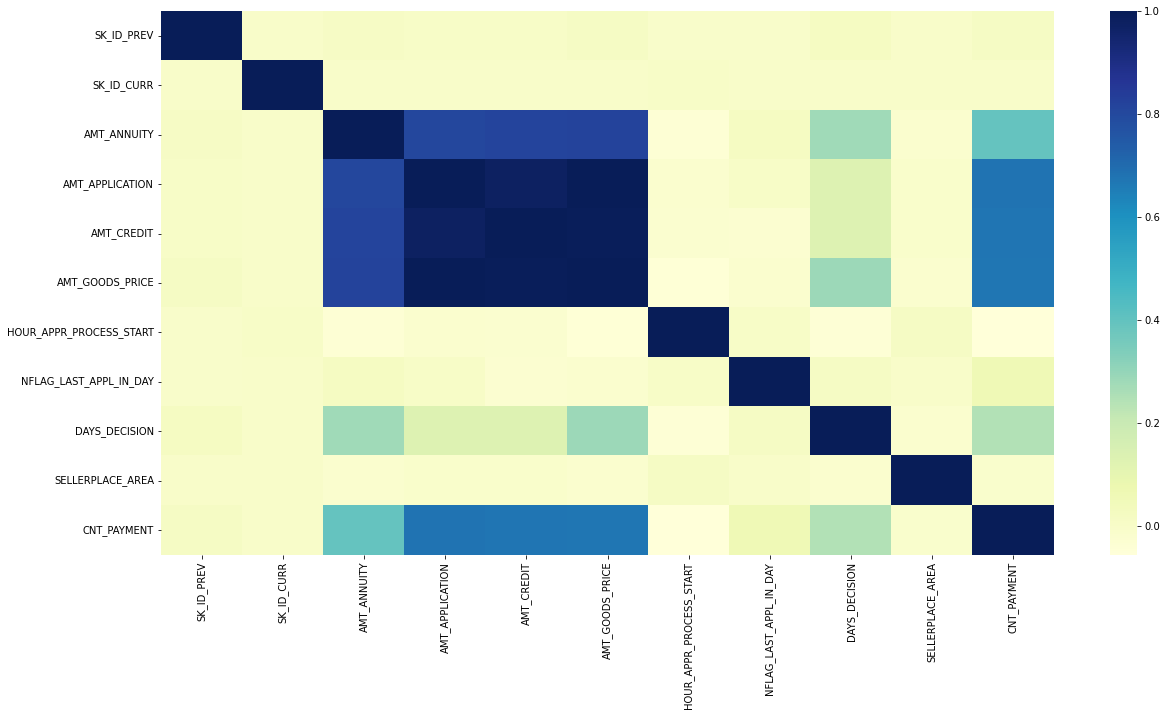

In [ ]:
plt.figure(figsize = (20, 10))
print(prev_appns.corr().shape)
dataplot = sns.heatmap(prev_appns.corr(), cmap="YlGnBu")

In [ ]:
prev_appns['AMT_CREDIT'].corr(prev_appns['AMT_APPLICATION'])

0.975824193610424

https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas


In [ ]:
for ele in appns.columns:
  print(ele)

SK_ID_CURR
TARGET
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
DAYS_BIRTH
DAYS_EMPLOYED
FLAG_CONT_MOBILE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
ORGANIZATION_TYPE
AMT_REQ_CREDIT_BUREAU_MON
AMT_REQ_CREDIT_BUREAU_QRT


In [ ]:
with pd.option_context('display.max_rows', None,):
  print(corrs.unstack().abs().sort_values())

CNT_FAM_MEMBERS            FLAG_CONT_MOBILE             0.000217
FLAG_CONT_MOBILE           CNT_FAM_MEMBERS              0.000217
AMT_REQ_CREDIT_BUREAU_MON  SK_ID_CURR                   0.000341
SK_ID_CURR                 AMT_REQ_CREDIT_BUREAU_MON    0.000341
AMT_CREDIT                 SK_ID_CURR                   0.000350
SK_ID_CURR                 AMT_CREDIT                   0.000350
FLAG_CONT_MOBILE           TARGET                       0.000370
TARGET                     FLAG_CONT_MOBILE             0.000370
SK_ID_CURR                 AMT_ANNUITY                  0.000438
AMT_ANNUITY                SK_ID_CURR                   0.000438
CNT_FAM_MEMBERS            AMT_REQ_CREDIT_BUREAU_QRT    0.000670
AMT_REQ_CREDIT_BUREAU_QRT  CNT_FAM_MEMBERS              0.000670
SK_ID_CURR                 AMT_REQ_CREDIT_BUREAU_QRT    0.000804
AMT_REQ_CREDIT_BUREAU_QRT  SK_ID_CURR                   0.000804
REGION_RATING_CLIENT       SK_ID_CURR                   0.001067
SK_ID_CURR               

In [ ]:
with pd.option_context('display.max_rows', None,):
  print(prev_appns.corr().unstack().abs().sort_values())

SK_ID_CURR               CNT_PAYMENT                0.000031
CNT_PAYMENT              SK_ID_CURR                 0.000031
SK_ID_CURR               NFLAG_LAST_APPL_IN_DAY     0.000098
NFLAG_LAST_APPL_IN_DAY   SK_ID_CURR                 0.000098
AMT_CREDIT               SK_ID_CURR                 0.000194
SK_ID_CURR               AMT_CREDIT                 0.000194
AMT_APPLICATION          SK_ID_CURR                 0.000280
SK_ID_CURR               AMT_APPLICATION            0.000280
SK_ID_PREV               SK_ID_CURR                 0.000321
SK_ID_CURR               SK_ID_PREV                 0.000321
                         AMT_GOODS_PRICE            0.000369
AMT_GOODS_PRICE          SK_ID_CURR                 0.000369
SK_ID_CURR               AMT_ANNUITY                0.000577
AMT_ANNUITY              SK_ID_CURR                 0.000577
DAYS_DECISION            SK_ID_CURR                 0.000637
SK_ID_CURR               DAYS_DECISION              0.000637
NFLAG_LAST_APPL_IN_DAY  

In [ ]:
print(default.corr().unstack().dropna().abs().sort_values()[-66:-56])

AMT_REQ_CREDIT_BUREAU_MON  DAYS_BIRTH                   0.010923
DAYS_BIRTH                 FLAG_CONT_MOBILE             0.011826
FLAG_CONT_MOBILE           DAYS_BIRTH                   0.011826
AMT_REQ_CREDIT_BUREAU_QRT  DAYS_EMPLOYED                0.012447
DAYS_EMPLOYED              AMT_REQ_CREDIT_BUREAU_QRT    0.012447
AMT_ANNUITY                DAYS_BIRTH                   0.014303
DAYS_BIRTH                 AMT_ANNUITY                  0.014303
DAYS_EMPLOYED              AMT_INCOME_TOTAL             0.014979
AMT_INCOME_TOTAL           DAYS_EMPLOYED                0.014979
AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT    0.019555
dtype: float64


In [ ]:
print(non_default.corr().unstack().dropna().abs().sort_values()[-70:-60])

DAYS_BIRTH                 AMT_REQ_CREDIT_BUREAU_QRT    0.015432
AMT_REQ_CREDIT_BUREAU_QRT  AMT_INCOME_TOTAL             0.017673
AMT_INCOME_TOTAL           AMT_REQ_CREDIT_BUREAU_QRT    0.017673
FLAG_CONT_MOBILE           AMT_INCOME_TOTAL             0.018814
AMT_INCOME_TOTAL           FLAG_CONT_MOBILE             0.018814
FLAG_CONT_MOBILE           AMT_ANNUITY                  0.021397
AMT_ANNUITY                FLAG_CONT_MOBILE             0.021397
AMT_REQ_CREDIT_BUREAU_QRT  AMT_CREDIT                   0.021823
AMT_CREDIT                 AMT_REQ_CREDIT_BUREAU_QRT    0.021823
                           FLAG_CONT_MOBILE             0.023097
dtype: float64


# checking imbalance

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


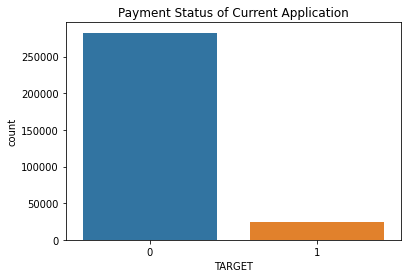

defaulter rate 8.07298695639449


In [ ]:
plt.title("Payment Status of Current Application")
sns.countplot(appns['TARGET'])
plt.show()

distribution = appns['TARGET'].value_counts()
print('defaulter rate', distribution[1]/len(appns['TARGET']) *100)

The data is imbalanced as expected. 2% of the loans in the banking systems are usually are reported as willful defaulters. This bank has a defaulter rate of 8% which is 4 times the industry. The bank should consider choosing loan candidates very conservatively.

# univariate analysis for 'appns'

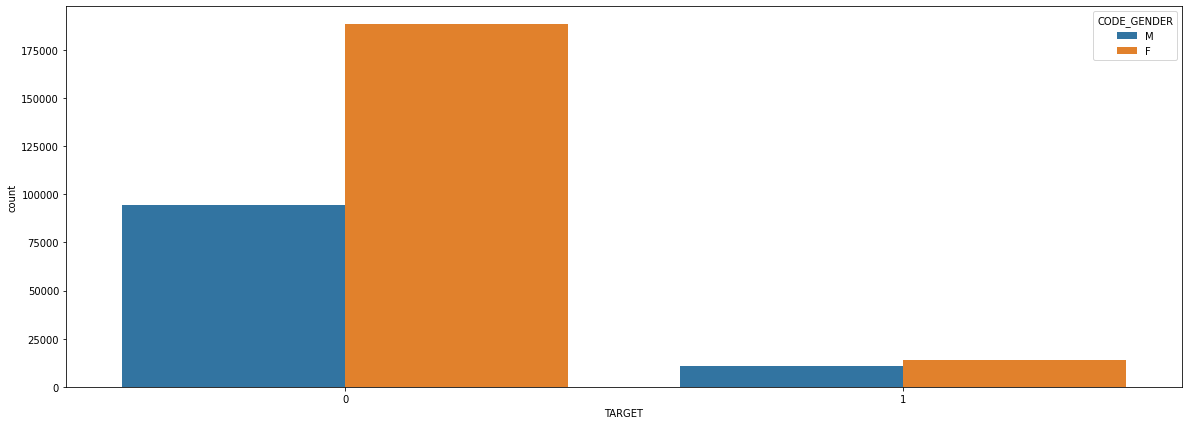

F    66.60417
M    33.39583
Name: CODE_GENDER, dtype: float64
F    57.079557
M    42.920443
Name: CODE_GENDER, dtype: float64


In [ ]:
plt.figure(figsize = (20, 7))
sns.countplot(hue = appns['CODE_GENDER'], x = appns['TARGET'])
plt.show()

print(non_default['CODE_GENDER'].value_counts()/len(non_default['CODE_GENDER'])*100)
print(default['CODE_GENDER'].value_counts()/len(default['CODE_GENDER'])*100)

Females make majority of the people who apply for loans.
But males have a tendoncy to default more than females.

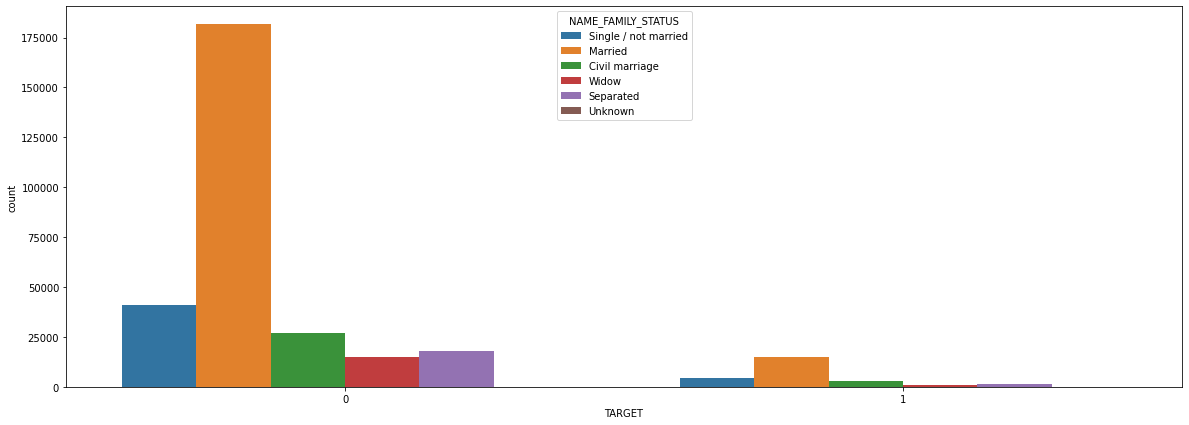

Married                 64.234369
Single / not married    14.499331
Civil marriage           9.485217
Separated                6.420642
Widow                    5.359733
Unknown                  0.000708
Name: NAME_FAMILY_STATUS, dtype: float64
Married                 59.818731
Single / not married    17.953676
Civil marriage          11.927492
Separated                6.525680
Widow                    3.774421
Name: NAME_FAMILY_STATUS, dtype: float64


In [ ]:
plt.figure(figsize = (20, 7))
sns.countplot(hue = appns['NAME_FAMILY_STATUS'], x = appns['TARGET'])
plt.show()

print(non_default['NAME_FAMILY_STATUS'].value_counts()/len(non_default['NAME_FAMILY_STATUS'])*100)
print(default['NAME_FAMILY_STATUS'].value_counts()/len(default['NAME_FAMILY_STATUS'])*100)

Married people are less likely to default whereas single people are more likely to default. More indepth look into correlation between single people, their incomes and their default rate.

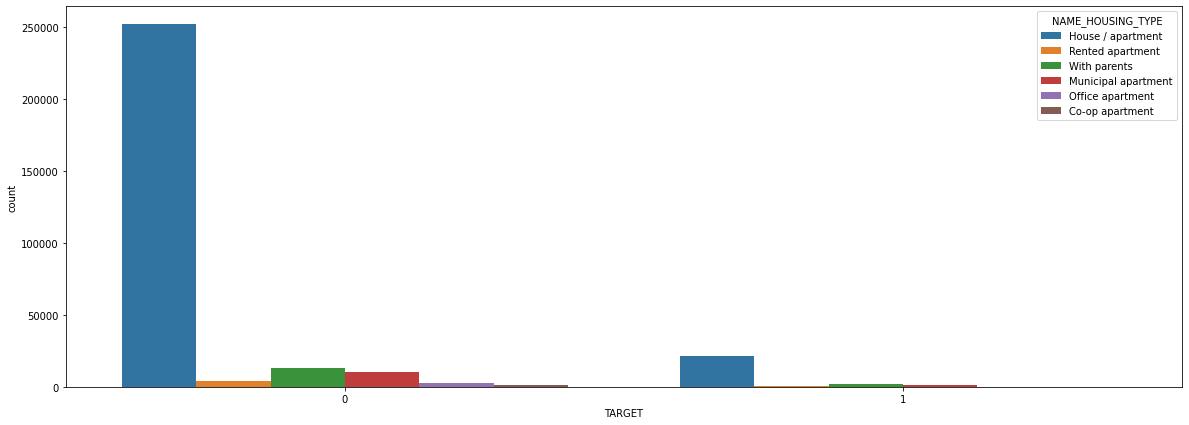

House / apartment      89.002130
With parents            4.635598
Municipal apartment     3.617846
Rented apartment        1.514069
Office apartment        0.864929
Co-op apartment         0.365428
Name: NAME_HOUSING_TYPE, dtype: float64
House / apartment      85.687815
With parents            6.992951
Municipal apartment     3.846928
Rented apartment        2.420947
Office apartment        0.692850
Co-op apartment         0.358510
Name: NAME_HOUSING_TYPE, dtype: float64


In [ ]:
plt.figure(figsize = (20, 7))
sns.countplot(hue = appns['NAME_HOUSING_TYPE'], x = appns['TARGET'])
plt.show()

print(non_default['NAME_HOUSING_TYPE'].value_counts()/len(non_default['NAME_HOUSING_TYPE'])*100)
print(default['NAME_HOUSING_TYPE'].value_counts()/len(default['NAME_HOUSING_TYPE'])*100)

people with houses make up for most of the applications maybe because they can provide houses as collaterals and have better incomes. 
People who live with the parents are more likely to default. 

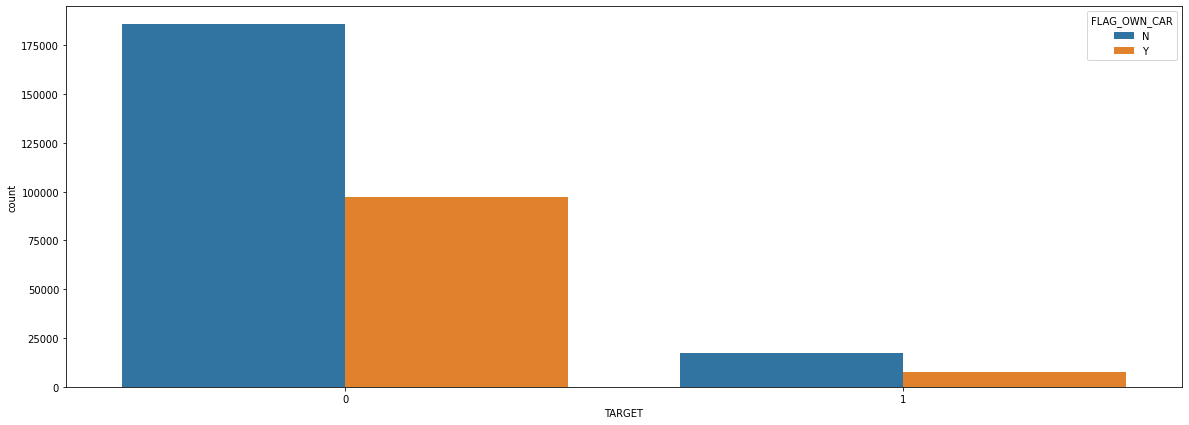

N    65.68264
Y    34.31736
Name: FLAG_OWN_CAR, dtype: float64
N    69.482377
Y    30.517623
Name: FLAG_OWN_CAR, dtype: float64


In [ ]:
plt.figure(figsize = (20, 7))
sns.countplot(hue = appns['FLAG_OWN_CAR'], x = appns['TARGET'])
plt.show()

print(non_default['FLAG_OWN_CAR'].value_counts()/len(non_default['FLAG_OWN_CAR'])*100)
print(default['FLAG_OWN_CAR'].value_counts()/len(default['FLAG_OWN_CAR'])*100)

People who do not own a car are at more risk of defaulting.

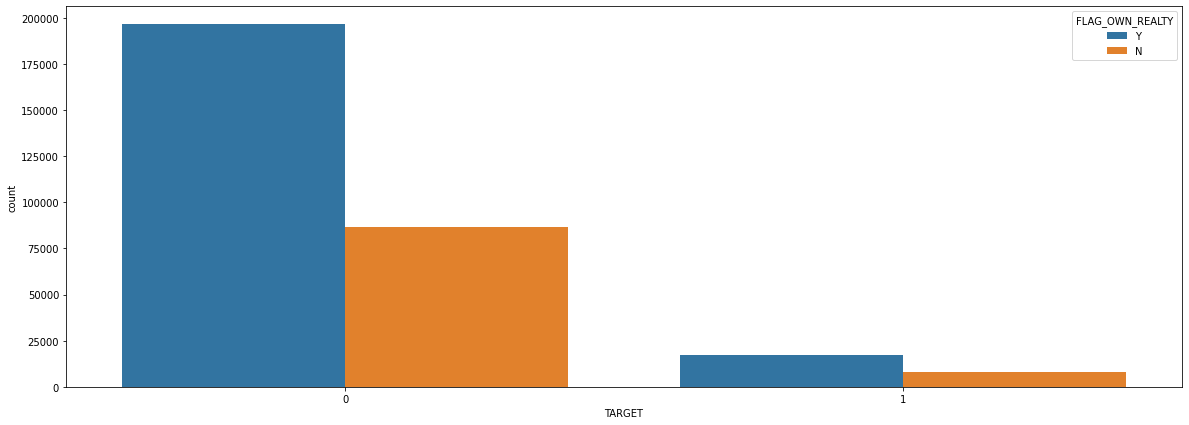

Y    69.450832
N    30.549168
Name: FLAG_OWN_REALTY, dtype: float64
Y    68.410876
N    31.589124
Name: FLAG_OWN_REALTY, dtype: float64


In [ ]:
plt.figure(figsize = (20, 7))
sns.countplot(hue = appns['FLAG_OWN_REALTY'], x = appns['TARGET'])
plt.show()


print(non_default['FLAG_OWN_REALTY'].value_counts()/len(non_default['FLAG_OWN_REALTY'])*100)
print(default['FLAG_OWN_REALTY'].value_counts()/len(default['FLAG_OWN_REALTY'])*100)

There seems to be very little difference between people who own a house or not. 

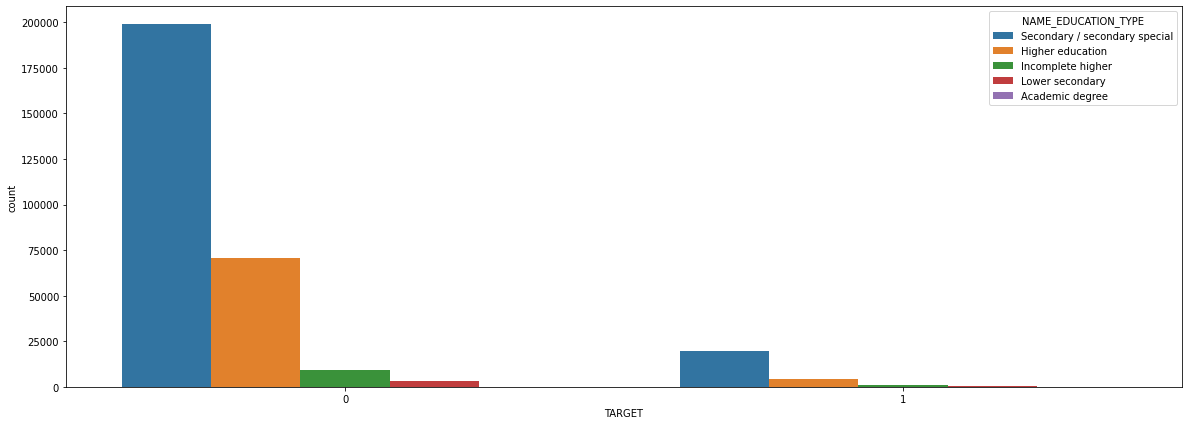

Non Defaulters
Secondary / secondary special    70.349368
Higher education                 25.064560
Incomplete higher                 3.326706
Lower secondary                   1.202411
Academic degree                   0.056954
Name: NAME_EDUCATION_TYPE, dtype: float64
Defaulters
Secondary / secondary special    78.646526
Higher education                 16.149043
Incomplete higher                 3.512588
Lower secondary                   1.679758
Academic degree                   0.012085
Name: NAME_EDUCATION_TYPE, dtype: float64


In [ ]:
plt.figure(figsize = (20, 7))
sns.countplot(x = appns['TARGET'], hue = appns['NAME_EDUCATION_TYPE'])
plt.show()
print("Non Defaulters")
print(non_default['NAME_EDUCATION_TYPE'].value_counts()/len(non_default['NAME_EDUCATION_TYPE'])*100)
print("Defaulters")
print(default['NAME_EDUCATION_TYPE'].value_counts()/len(default['NAME_EDUCATION_TYPE'])*100)

Defaulters are more likely to have a secondary education and people who have a higher education are less likely to default. 

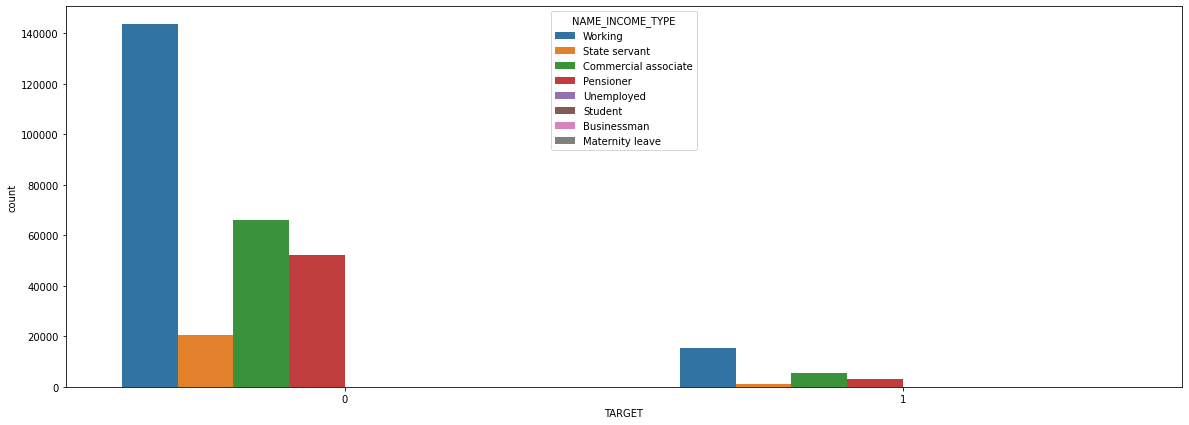

Non Defaulters
Working                 50.780382
Commercial associate    23.438351
Pensioner               18.529655
State servant            7.235692
Student                  0.006368
Unemployed               0.004953
Businessman              0.003538
Maternity leave          0.001061
Name: NAME_INCOME_TYPE, dtype: float64
Defaulters
Working                 61.325277
Commercial associate    21.591138
Pensioner               12.012085
State servant            5.031219
Unemployed               0.032226
Maternity leave          0.008056
Name: NAME_INCOME_TYPE, dtype: float64


In [ ]:
plt.figure(figsize = (20, 7))
sns.countplot(x = appns['TARGET'], hue = appns['NAME_INCOME_TYPE'])
plt.show()
print("Non Defaulters")
print(non_default['NAME_INCOME_TYPE'].value_counts()/len(non_default['NAME_INCOME_TYPE'])*100)
print("Defaulters")
print(default['NAME_INCOME_TYPE'].value_counts()/len(default['NAME_INCOME_TYPE'])*100)

According to the data
- State servants are less likely to default
- Pensioners are less likely to 
default
- Students and bussinessmen are do not default, maybe because of the structure of their loans or due to the amount lended.
- Working professionals are more likely to default. More information should be found out about employment of people who defaulted. That can give an interesting insight. 

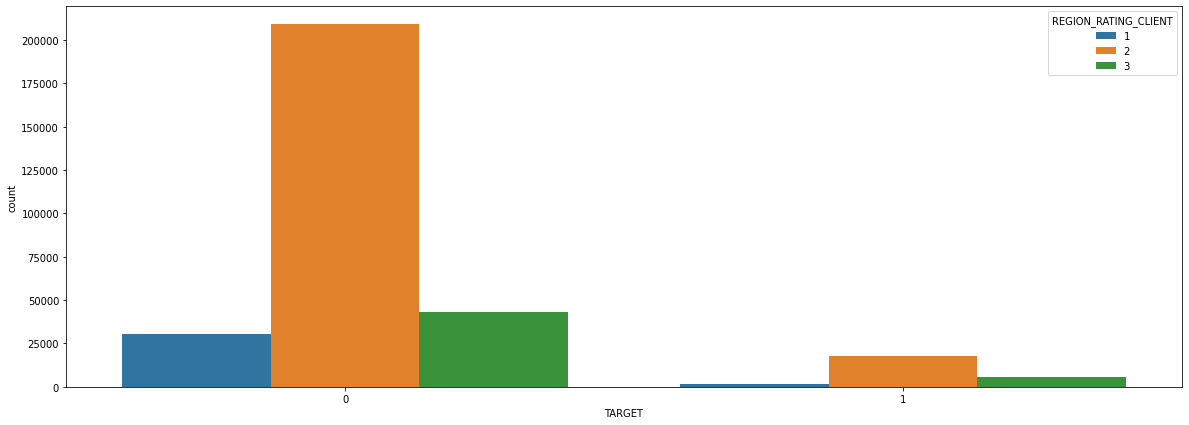

Non Defaulters
2    73.960846
3    15.198350
1    10.840803
Name: REGION_RATING_CLIENT, dtype: float64
Defaulters
2    72.132931
3    21.615307
1     6.251762
Name: REGION_RATING_CLIENT, dtype: float64


In [ ]:
plt.figure(figsize = (20, 7))
sns.countplot(x = appns['TARGET'], hue = appns['REGION_RATING_CLIENT'])
plt.show()
print("Non Defaulters")
print(non_default['REGION_RATING_CLIENT'].value_counts()/len(non_default['REGION_RATING_CLIENT'])*100)
print("Defaulters")
print(default['REGION_RATING_CLIENT'].value_counts()/len(default['REGION_RATING_CLIENT'])*100)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


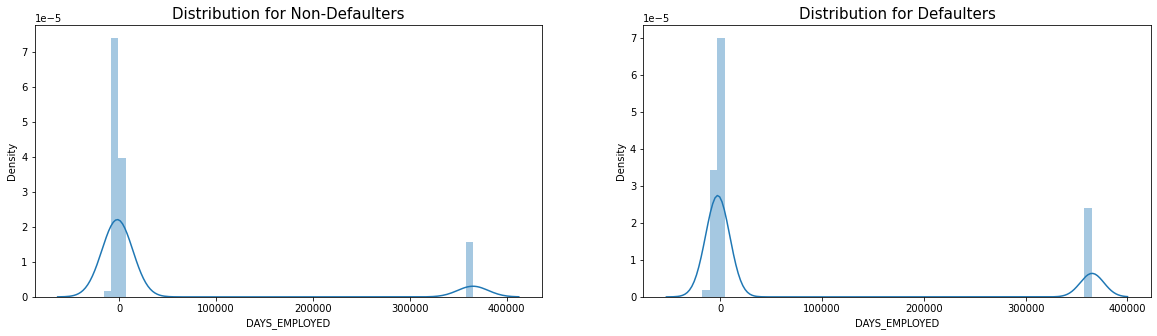

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,5))
sns.distplot(a=default['DAYS_EMPLOYED'],ax=ax1)
ax1.set_title(f'Distribution for Non-Defaulters',fontsize=15)
            
sns.distplot(a=non_default['DAYS_EMPLOYED'],ax=ax2)
ax2.set_title(f'Distribution for Defaulters',fontsize=15)           
plt.show()

People who are unemployed for more than 350000 are more likely to default. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


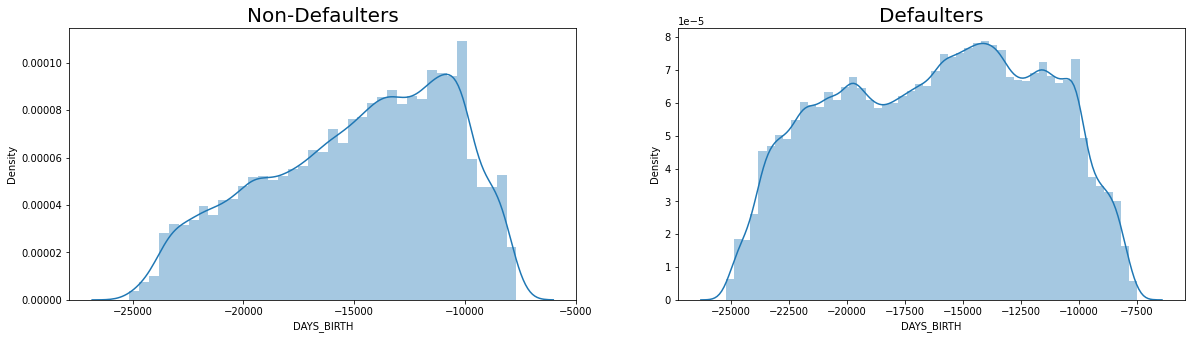

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,5))
sns.distplot(a=default['DAYS_BIRTH'],ax=ax1)
ax1.set_title('Non-Defaulters',fontsize=20)
            
sns.distplot(a=non_default['DAYS_BIRTH'],ax=ax2)
ax2.set_title('Defaulters',fontsize=20)           
plt.show()

In [ ]:
default.columns

Index(['SK_ID_CURR', 'TARGET', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_CONT_MOBILE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'ORGANIZATION_TYPE',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT'],
      dtype='object')

# Bivariate Analysis

In [ ]:
default.columns

Index(['SK_ID_CURR', 'TARGET', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_CONT_MOBILE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'ORGANIZATION_TYPE',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT'],
      dtype='object')

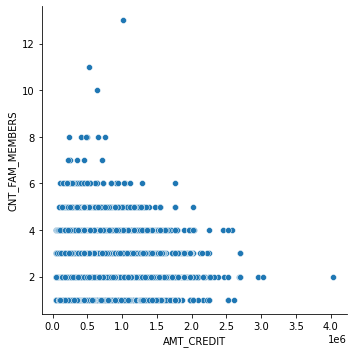

In [ ]:
sns.relplot(x=default["AMT_CREDIT"], y=default["CNT_FAM_MEMBERS"])

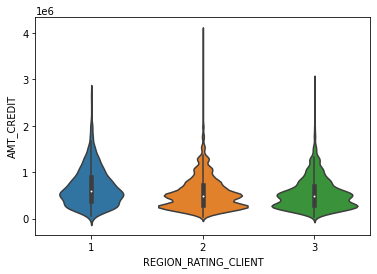

In [ ]:
sns.violinplot(y=default["AMT_CREDIT"], x=default["REGION_RATING_CLIENT"])


# Univariate analysis of 'prev_appns'

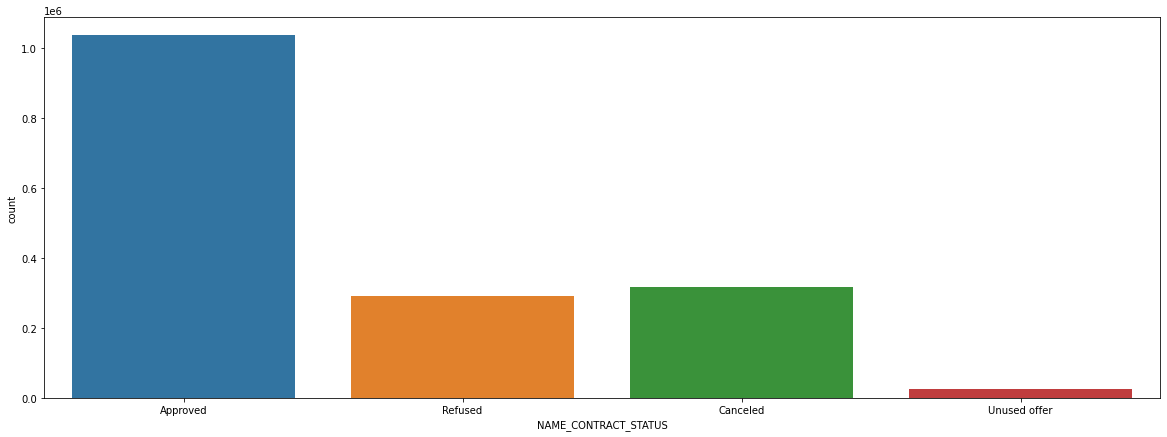

Approved        62.074740
Canceled        18.938831
Refused         17.403638
Unused offer     1.582791
Name: NAME_CONTRACT_STATUS, dtype: float64

In [ ]:
plt.figure(figsize = (20, 7))
sns.countplot(x = prev_appns['NAME_CONTRACT_STATUS'])
plt.show()

prev_appns['NAME_CONTRACT_STATUS'].value_counts()/len(prev_appns['NAME_CONTRACT_STATUS'])*100

almost 19% of the loans are cancelled. An indepth dive for these cancellations can provide an opportunity to increase profits. 

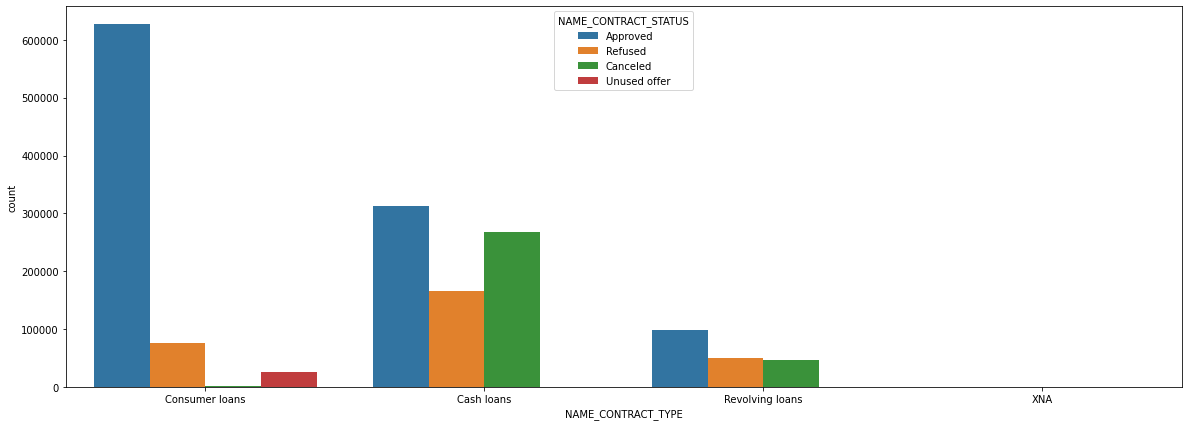

Cash loans         44.757917
Consumer loans     43.656142
Revolving loans    11.565225
XNA                 0.020716
Name: NAME_CONTRACT_TYPE, dtype: float64

In [ ]:
plt.figure(figsize = (20, 7))
sns.countplot(x = prev_appns['NAME_CONTRACT_TYPE'], hue = prev_appns['NAME_CONTRACT_STATUS'])
plt.show()

prev_appns['NAME_CONTRACT_TYPE'].value_counts()/len(prev_appns['NAME_CONTRACT_TYPE'])*100

A large portion of consumer loans are unused, the reason for their non-utilization should be found out as the resources that went into providing those loans could have been used somewhere else. 

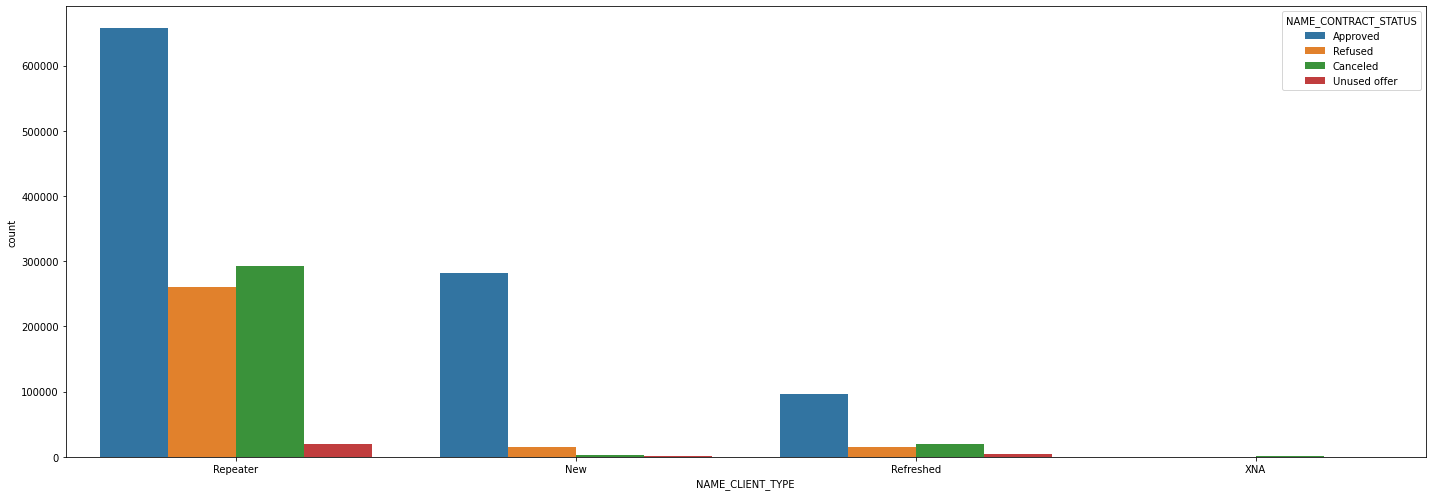

Repeater     73.718757
New          18.043376
Refreshed     8.121654
XNA           0.116213
Name: NAME_CLIENT_TYPE, dtype: float64

In [ ]:
plt.figure(figsize = (20, 7))
sns.countplot(x = prev_appns['NAME_CLIENT_TYPE'], hue = prev_appns['NAME_CONTRACT_STATUS'])
plt.tight_layout()
plt.show()

prev_appns['NAME_CLIENT_TYPE'].value_counts()/len(prev_appns['NAME_CLIENT_TYPE'])*100

New clients usuually do not cancel their loans where as repeaters and refreshed cancel their loans more than they are refused.
Repeaters are also more likey to get refused. The reason can be because of issues during their previous loans. 

In [ ]:
prev_appns.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

<Figure size 1440x576 with 0 Axes>

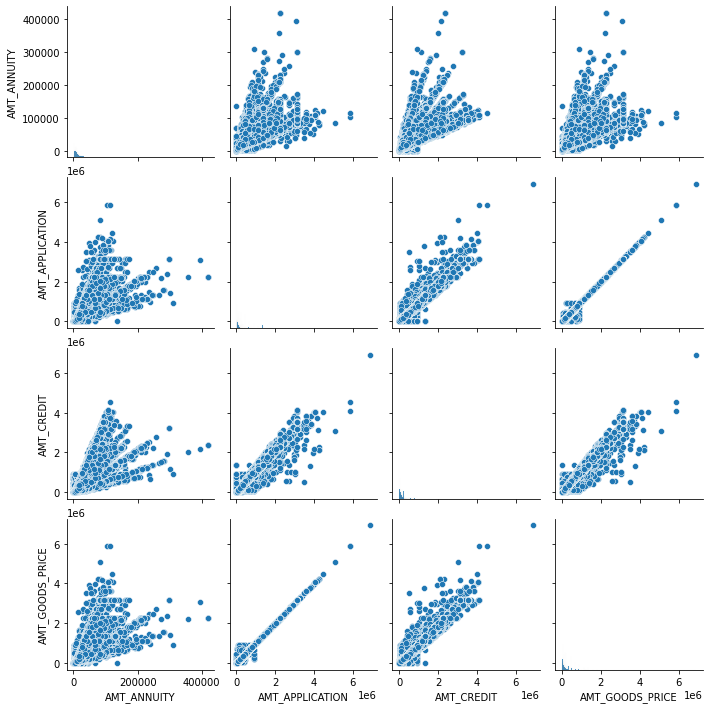

In [ ]:
plt.figure(figsize = (20, 7))
sns.pairplot(prev_appns[['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE']])
plt.show()

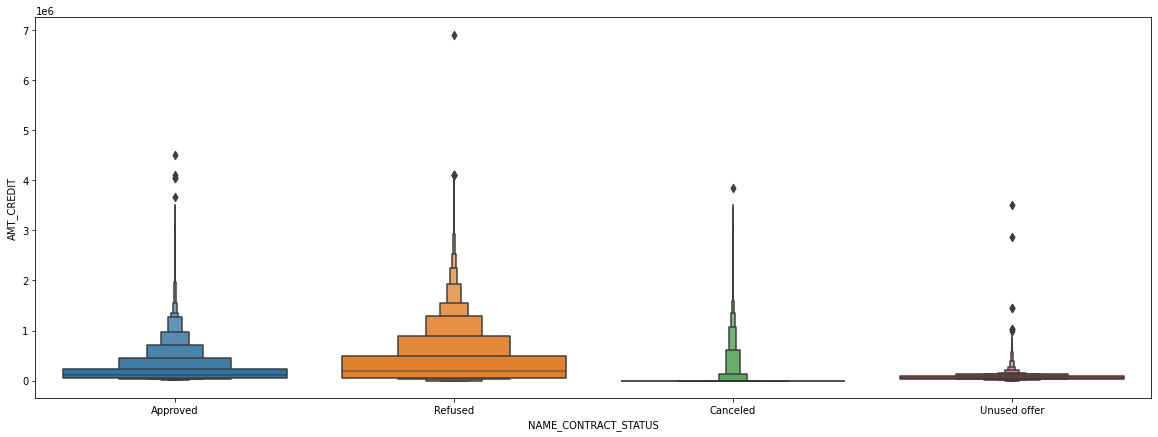

In [ ]:
plt.figure(figsize = (20, 7))
sns.boxenplot(y=prev_appns["AMT_CREDIT"], x=prev_appns["NAME_CONTRACT_STATUS"])